<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2020/21 Semester</h3></th>
    </tr>
</table>

In [1]:
# Import the Required Packages

from tensorflow import keras
print('keras: ', keras.__version__)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import os, shutil

keras:  2.2.4-tf


## Step 1: Data Loading

In [2]:
 #Set the base directory as the current directory
base_dir = os.getcwd()

#Set the base directory as where you save the downloaded food_images
image_dir = 'C:/Poly/Year 2/Year 2 sem 1/DL/Assignment/food-101/food-101/food-101/images' 

# Directories for your training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Assign the 10 types of food from your .txt file to a list variable 'food_list'
   
label_file = os.path.join(base_dir, '25.txt') 
# Refer to the report Appendix
# Please enter the name of .txt file which contains a list of food assigned to you
# Make sure you save the .txt file in your base_dir

with open(label_file, 'r') as f:
    x = f.readlines()
    
food_list =[]
for item in x:
    if item == '\n':
        continue        
    else:
        food_list.append(item.strip('\n'))
        
#copy the first 750 images to train folder
for item in food_list:
    train_food_dir = os.path.join(train_dir, item)
    os.mkdir(train_food_dir)
    img_list = os.listdir(os.path.join(image_dir, item))[:750]
    for fname in img_list:
        src = os.path.join(image_dir, item, fname)
        dst = os.path.join(train_food_dir, fname)
        shutil.copyfile(src, dst)
        
#copy the following 200 images [750:950] to validation folder
for item in food_list:
    validation_food_dir = os.path.join(validation_dir, item)
    os.mkdir(validation_food_dir)
    img_list = os.listdir(os.path.join(image_dir, item))[750:950]
    for fname in img_list:
        src = os.path.join(image_dir, item, fname)
        dst = os.path.join(validation_food_dir, fname)
        shutil.copyfile(src, dst)
        
#copy the remaining 50 images [950:1000] to test folder
for item in food_list:
    test_food_dir = os.path.join(test_dir, item)
    os.mkdir(test_food_dir)
    img_list = os.listdir(os.path.join(image_dir, item))[950:1000]
    for fname in img_list:
        src = os.path.join(image_dir, item, fname)
        dst = os.path.join(test_food_dir, fname)
        shutil.copyfile(src, dst)

## Step 2:  Develop the Image Classification Models

### Model #1

In [15]:
# Build the Model
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers

#Set image size as 150*150.
img_size = 50

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()



model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['acc'])



# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
        rescale=1./255)
#      rotation_range=40,
#      width_shift_range=0.2,
#      height_shift_range=0.2,
#      shear_range=0.2,
#      zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 50x50
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

#test_generator = test_datagen.flow_from_directory(
#        test_food_dir,
#        target_size=(img_size, img_size),
#        batch_size=10,
#        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')




Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 128)        

In [16]:
# Train the Model

history = model.fit_generator(
      train_generator,
      steps_per_epoch=150, # batch: 10 * 75 = 750 training images
      epochs=30,
      validation_data=validation_generator,
      validation_steps=100) # 10 * 20 = 200 = 200 validation images

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 150 steps, validate for 100 steps
Epoch 1/30
150/150 [==============================] - 103s 686ms/step - loss: 2.1652 - acc: 0.2083 - val_loss: 1.9008 - val_acc: 0.3240
Epoch 2/30
150/150 [==============================] - 97s 647ms/step - loss: 1.9216 - acc: 0.3267 - val_loss: 1.7711 - val_acc: 0.3845
Epoch 3/30
150/150 [==============================] - 97s 645ms/step - loss: 1.7964 - acc: 0.3796 - val_loss: 1.7607 - val_acc: 0.4015
Epoch 4/30
150/150 [==============================] - 101s 672ms/step - loss: 1.6898 - acc: 0.4223 - val_loss: 1.6919 - val_acc: 0.4290
Epoch 5/30
150/150 [==============================] - 103s 689ms/step - loss: 1.5822 - acc: 0.4643 - val_loss: 1.6785 - val_acc: 0.4245
Epoch 6/30
150/150 [==============================] - 103s 688ms/step - loss: 1.4811 - acc: 0.4977 - val_loss: 1.4606 - val_acc: 0.5035
Epoch 7/30
150/150 [==============================] - 108s 722ms/step - loss: 1.3822 - acc: 

KeyboardInterrupt: 

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save('food_model_1.h5')

### Model #2

In [12]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers

img_size = 150

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

conv_base.trainable = False

model = models.Sequential()
model.add(conv_base) #ResNet50 pretrained
#model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()
conv_base.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255) 

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

#test_generator = test_datagen.flow_from_directory(
#        test_food_dir,
#        target_size=(img_size, img_size),
#        batch_size=10,
#        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2570      
Total params: 16,814,666
Trainable params: 2,099,978
Non-trainable params: 14,714,688
_________________________________________________________________
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 150, 150, 3)]     0         
___________________

In [13]:
# Train the Model

history = model.fit_generator(
      train_generator,
      steps_per_epoch=375, # batch: 10 * 75 = 750 training images
      epochs=30,
      validation_data=validation_generator,
      validation_steps=100) # 10 * 20 = 200 = 200 validation images

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 375 steps, validate for 100 steps
Epoch 1/30
375/375 [==============================] - 2678s 7s/step - loss: 1.9535 - acc: 0.3267 - val_loss: 1.6138 - val_acc: 0.4845
Epoch 2/30
375/375 [==============================] - 2472s 7s/step - loss: 1.5798 - acc: 0.4767 - val_loss: 1.3715 - val_acc: 0.5500
Epoch 3/30
375/375 [==============================] - 3865s 10s/step - loss: 1.4242 - acc: 0.5296 - val_loss: 1.2750 - val_acc: 0.5845
Epoch 4/30
375/375 [==============================] - 3534s 9s/step - loss: 1.3446 - acc: 0.5555 - val_loss: 1.1958 - val_acc: 0.6020
Epoch 5/30
375/375 [==============================] - 2170s 6s/step - loss: 1.2859 - acc: 0.5737 - val_loss: 1.1437 - val_acc: 0.6235
Epoch 6/30
375/375 [==============================] - 2267s 6s/step - loss: 1.2353 - acc: 0.5928 - val_loss: 1.1097 - val_acc: 0.6355
Epoch 7/30
375/375 [==============================] - 8097s 22s/step - loss: 1.1994 - acc: 0.6019 - v

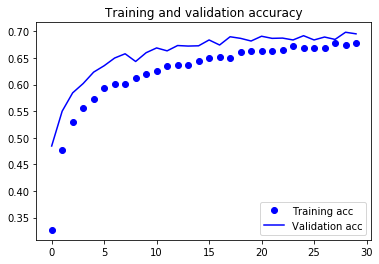

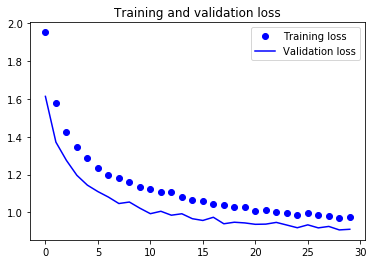

In [14]:
# Plot the Training and Validation Accuracy & Loss Scores
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save('food_model_2.h5')

## Step 3 – Evaluate the Developed Models using Testing Images

In [ ]:
# Model #1
model.load_weights('food_model_1.h5')




In [ ]:
# Model #2
model.load_weights('food_model_2.h5')




In [ ]:
# Save the best model


model.save('food_model_best.h5')

## Step 4  – Use the best model to make prediction

In [ ]:
# Load the model
model.load_weights('food_model_best.h5')

In [ ]:
# Load the food list (in alphabetical order)
with open('??.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

In [ ]:
# Define some related functions for image process and model prediction
from keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

In [ ]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = '??.jpeg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)